<a href="https://colab.research.google.com/github/Rishabhsingh2211/IPL-Match-Analysis/blob/main/IPL_match_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing necessary libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Part 1 : Reading data of matches.csv file using pandas library**

In [2]:
# Read the CSV file into a DataFrame
ipl_df = pd.read_csv('/content/matches.csv')

# Print the DataFrame
ipl_df


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [3]:
#checking the shape of dataset
print(ipl_df.shape)

#And also check the column names of dataset 
ipl_df.columns

(756, 18)


Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

**Part 2 : Data cleaning and Preparation**

* In this project we are noIt using "umpire1" "umpire2" and "umpire3" so we are removing this from data set
   

In [4]:
#inplace argument is used to make permanent changes in the dataframe(ipl_df) by setting it to True
ipl_df.drop(columns=['umpire1','umpire2','umpire3'],inplace=True)

#again we are checking tha column names 
ipl_df.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue'],
      dtype='object')

In [5]:
#see all seasson of ipl 
ipl_df["season"].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019])

In [6]:
#now see the team that have played
ipl_df["team1"].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [7]:
#Now see all the cities in which matches played
ipl_df["city"].unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan,
       'Mohali', 'Bengaluru'], dtype=object)

**From th above observation, we have to cleaning some data**

* Pune was representad by various team names like 'Rising Pune Supergiant', 'Pune Warriors' & 'Rising Pune Supergiants' so we will change these with the recent team name 'Rising Pune Supergiant' in various columns.

* Now 2nd change is in team name Delhi, earlier the team name was  'Delhi Daredevils' but later it was changed to 'delhi capitals', so we have to replace team mane with 'Delhi Capitalas'

*   Banglore was remaned as Bengluru so we have to change the name for city Benglore to Bengluru to avoid errors







In [8]:
#Now we are replacing the teams name in various columns,also replacing the city name 
ipl_df.team1.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant', 'Delhi Daredevils':'Delhi Capitals','Pune Warriors' : 'Rising Pune Supergiant'},inplace=True)
ipl_df.team2.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant', 'Delhi Daredevils':'Delhi Capitals','Pune Warriors' : 'Rising Pune Supergiant'},inplace=True)
ipl_df.toss_winner.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant', 'Delhi Daredevils':'Delhi Capitals','Pune Warriors' : 'Rising Pune Supergiant'},inplace=True)
ipl_df.winner.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant', 'Delhi Daredevils':'Delhi Capitals','Pune Warriors' : 'Rising Pune Supergiant'},inplace=True)
ipl_df.city.replace({'Bangalore' : 'Bengaluru'},inplace=True)

**Now check the result**

In [9]:
ipl_df.team1.unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Capitals', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala'], dtype=object)

In [10]:
ipl_df.team2.unique()

array(['Royal Challengers Bangalore', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Capitals',
       'Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rajasthan Royals', 'Chennai Super Kings', 'Deccan Chargers',
       'Kochi Tuskers Kerala'], dtype=object)

In [11]:
ipl_df.toss_winner.unique()

array(['Royal Challengers Bangalore', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Sunrisers Hyderabad',
       'Mumbai Indians', 'Gujarat Lions', 'Delhi Capitals',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala'], dtype=object)

In [12]:
ipl_df.winner.unique()

array(['Sunrisers Hyderabad', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians', 'Delhi Capitals',
       'Gujarat Lions', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Kochi Tuskers Kerala', nan], dtype=object)

In [13]:
ipl_df.city.unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bengaluru', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan,
       'Mohali'], dtype=object)

**Now we will check null values**

In [14]:
#Check the null values in each column
ipl_df.isna().sum()

id                 0
season             0
city               7
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
venue              0
dtype: int64

In [15]:
#checking total null values
ipl_df.isna().sum().sum()


15

Search NaN values in our dataset

In [16]:
NaN_df = ipl_df[ipl_df.isna().any(axis = 1)]

#To make easier we will highlight the null values
NaN_df.style.highlight_null(null_color = 'red')

<ipython-input-16-fa77c59b3e66>:4: FutureWarning: `null_color` is deprecated: use `color` instead
  NaN_df.style.highlight_null(null_color = 'red')


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
300,301,2011,Delhi,2011-05-21,Delhi Capitals,Rising Pune Supergiant,Delhi Capitals,bat,no result,0,nan,0,0,nan,Feroz Shah Kotla
461,462,2014,nan,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium
462,463,2014,nan,2014-04-19,Kolkata Knight Riders,Delhi Capitals,Kolkata Knight Riders,bat,normal,0,Delhi Capitals,0,4,JP Duminy,Dubai International Cricket Stadium
466,467,2014,nan,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium
468,469,2014,nan,2014-04-25,Sunrisers Hyderabad,Delhi Capitals,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium
469,470,2014,nan,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium
474,475,2014,nan,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium
476,477,2014,nan,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium
545,546,2015,Bengaluru,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,nan,0,0,nan,M Chinnaswamy Stadium
570,571,2015,Bengaluru,2015-05-17,Delhi Capitals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,nan,0,0,nan,M Chinnaswamy Stadium


**From the above observation**


1. In city column, NaN value represent, the stadium location located in dubai, so we have to replace NaN value with Dubai.
2. In 'winner' and 'player_of_match' NaN values when match has no result, So we can assume draw or cancelled. So we will replace these with "draw\cancelled"



In [17]:
#replacing the NaN values in city
ipl_df.loc[[461,462,466,468,469,474,476], 'city'] = "Dubai"

In [18]:
#replace NaN values of "winner" and "player_of_match" column with "Draw/Cancelled".
ipl_df.fillna({"winner":"Draw/Cancelled","player_of_match":"Draw/Cancelled"},inplace=True)

In [19]:
#now check again null value in dataset
ipl_df.isna().sum().sum()

0

**Part 3 : Data analysis and visualisation**

In [20]:
#total number of match played
ipl_df.id.count()

756

In [21]:
#In these matches some are tie, so we will find 
tie_matches = ipl_df[ipl_df.result == 'tie'].count()

tie_matches.result

9

**First we check the name of cities**

In [22]:
ipl_df.city.unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bengaluru', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah',
       'Dubai', 'Mohali'], dtype=object)

In [23]:
#Now we have to find the table of 'cities' and count total matches
cities = ipl_df.groupby('city')[['id']].count()
cities

,id
city,
Abu Dhabi,7
Ahmedabad,12
Bengaluru,80
Bloemfontein,2
Cape Town,7
Centurion,12
Chandigarh,46
Chennai,57
Cuttack,7


Set the data in organised manner

In [24]:
#rename the id column with matches
cities.rename(columns={'id':'matches'},inplace=True)

#sort the data ascending order
cities = cities.sort_values('matches' , ascending = False).reset_index()

#set the heatmap in dataframe
cities.style.background_gradient()



,city,matches
0,Mumbai,101
1,Bengaluru,80
2,Kolkata,77
3,Delhi,74
4,Hyderabad,64
5,Chennai,57
6,Jaipur,47
7,Chandigarh,46
8,Pune,38
9,Durban,15


From the above result we can see that there in 32 location where matches had been played

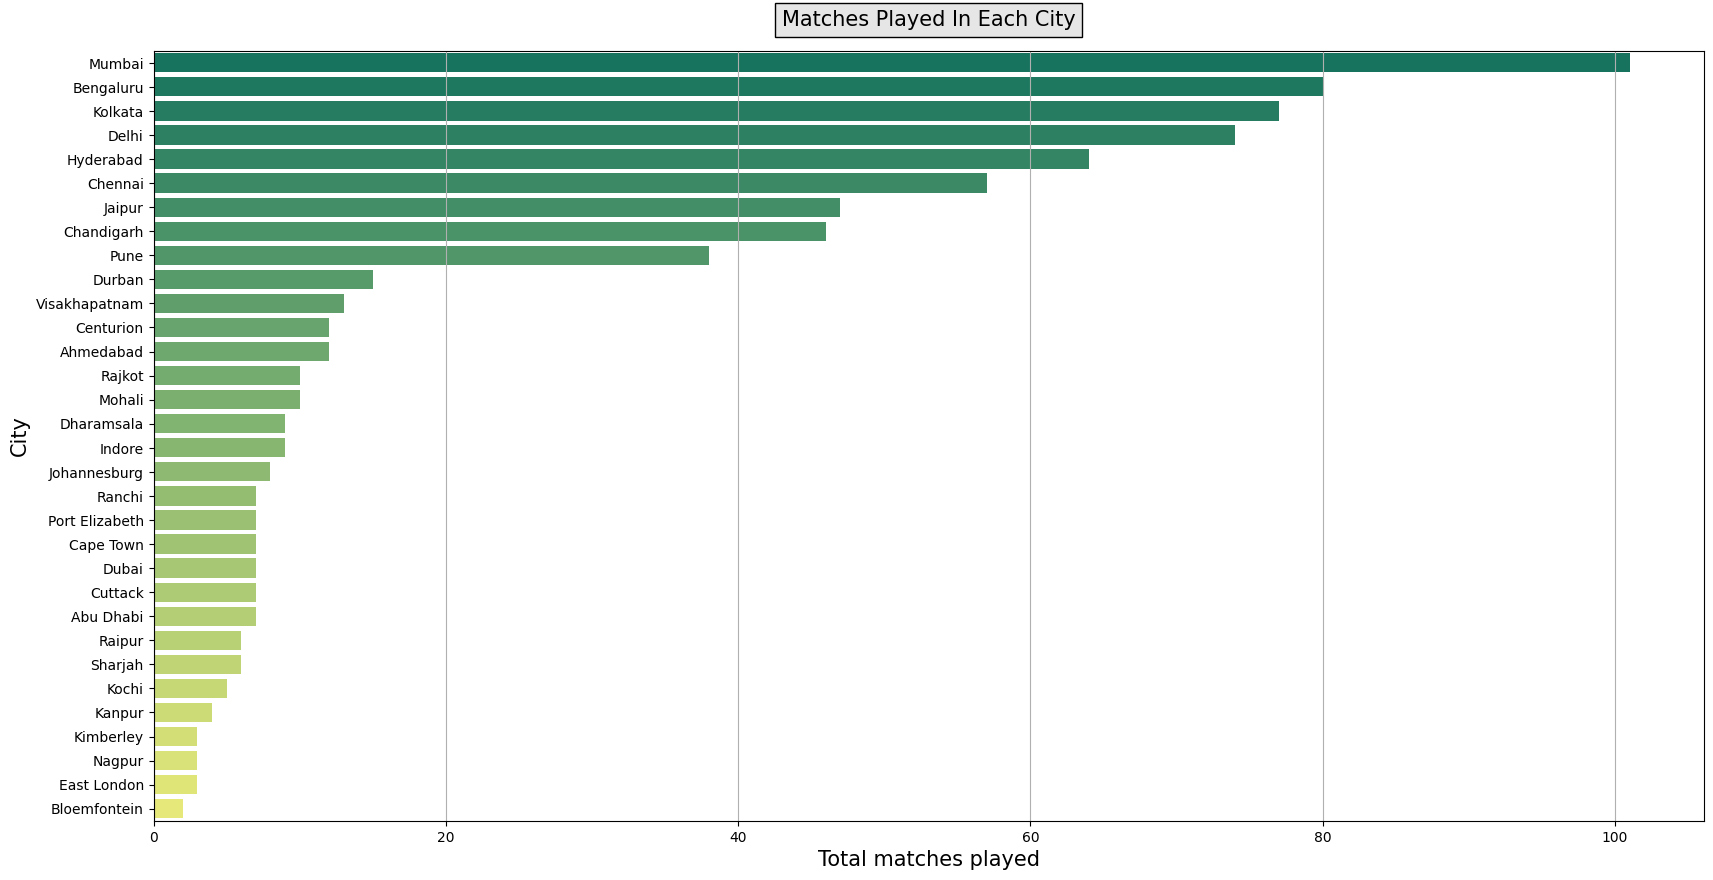

In [25]:
#plot city data in bar map
plt.figure(figsize = (20 , 10))

#draw gird lines
plt.grid()
plt.title('Matches Played In Each City' , fontsize = 15 , bbox = {'facecolor' : '0.9' , 'pad' : 5} , pad = 18)

#draw the bar chart
sns.barplot(x = 'matches' , y = 'city' , data = cities , palette = 'summer')
#sns.barplot(x='matches',y='city',data=cities,palette='winter')
plt.xlabel("Total matches played",fontsize=15)
plt.ylabel("City",fontsize=15)
plt.show()


From the above bar plat it seems that maximum number of matches play in 'Mumbai', 'Bengaluru' and 'Kolkata'

In [26]:
#Get matches played in every Season
season_df = ipl_df.groupby('season') [['id']].count()
season_df

,id
season,
2008,58
2009,57
2010,60
2011,73
2012,74
2013,76
2014,60
2015,59
2016,60


Set the data in organised manner

In [27]:
#rename the id column with no of matches
season_df.rename(columns={'id':'no of matches'},inplace=True)

#set the heatmap in dataframe
season_df.style.background_gradient()


,no of matches
season,
2008,58
2009,57
2010,60
2011,73
2012,74
2013,76
2014,60
2015,59
2016,60


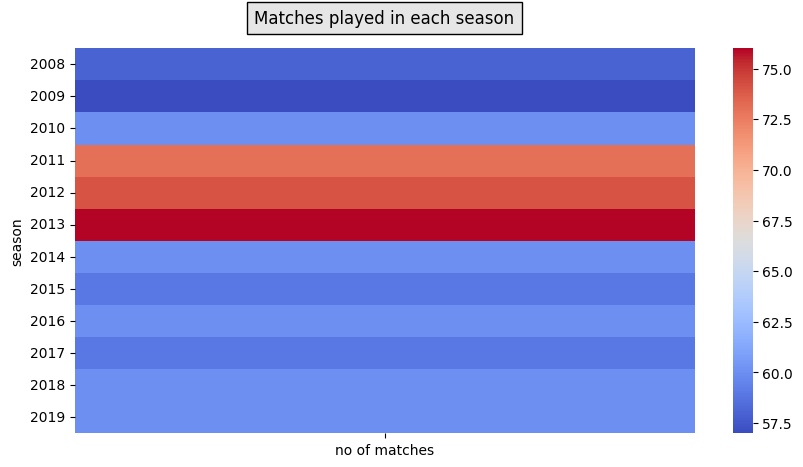

In [28]:
#plot data using heatmap
plt.figure(figsize=(10,5))
plt.title("Matches played in each season",bbox={'facecolor':'0.9','pad':5},pad=18)

#The heatmap especially uses to show 2D data in graphical format.It is a type of chart that uses different shades 
#of colors to represent data values
sns.heatmap(season_df,cmap='coolwarm');

From the above heatmap the most number of matches played in 2013.

**Matches won by each team**


In [29]:
winner_df = ipl_df.groupby('winner')[['id']].count()

#arrenge the data
winner_df = winner_df.sort_values('id' , ascending = False).reset_index()

# remove the data of 'Draw/Cancelled' 
winner_df = winner_df[:][winner_df['winner']!='Draw/Cancelled']

#rename the id with wins
winner_df.rename(columns = {'id':'wins'},inplace=True)

winner_df.style.background_gradient()

,winner,wins
0,Mumbai Indians,109
1,Chennai Super Kings,100
2,Kolkata Knight Riders,92
3,Royal Challengers Bangalore,84
4,Kings XI Punjab,82
5,Delhi Capitals,77
6,Rajasthan Royals,75
7,Sunrisers Hyderabad,58
8,Deccan Chargers,29
9,Rising Pune Supergiant,27


<BarContainer object of 12 artists>

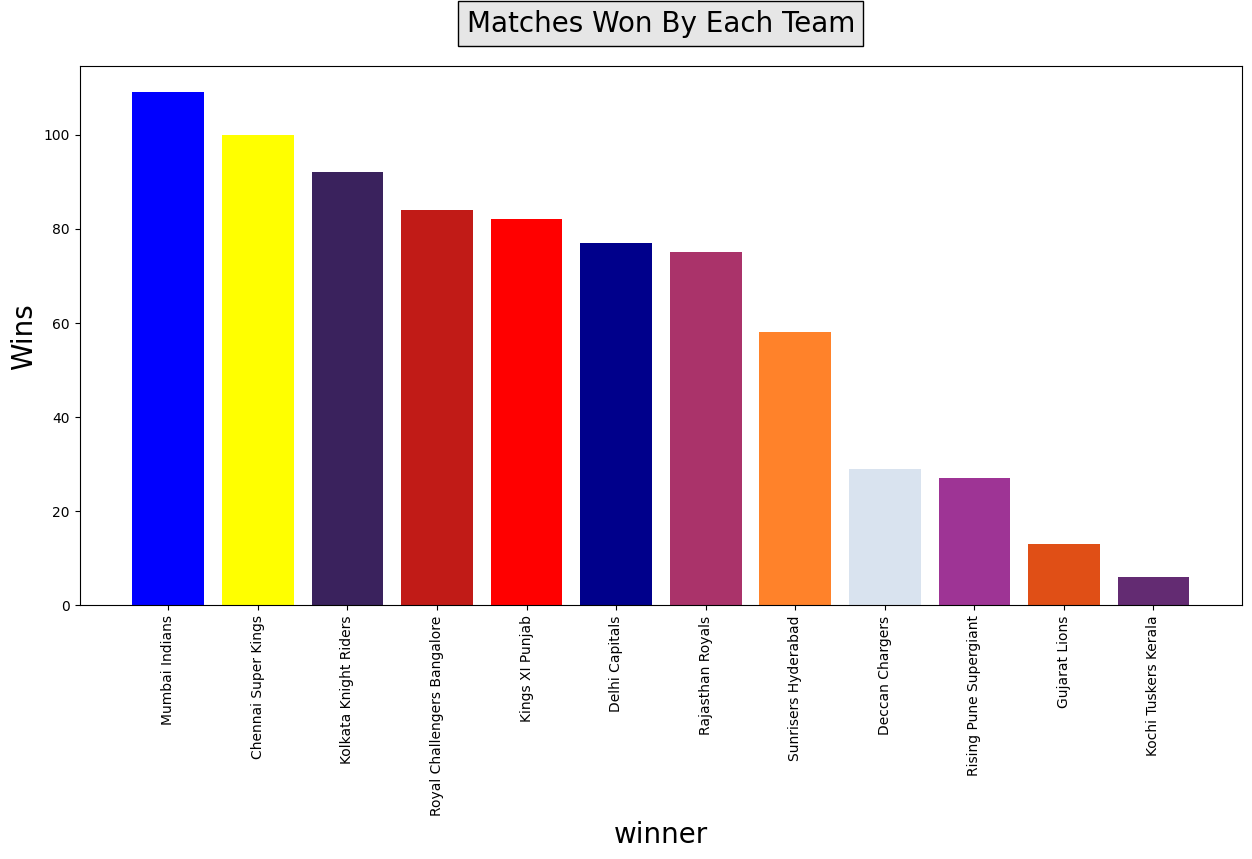

In [30]:
#we are using color code according to team jersey
plt.figure(figsize=(15,7))
plt.xlabel('winner',fontsize=20)
plt.ylabel('Wins',fontsize=20)

#to set the tick size 
plt.tick_params(labelsize=10)
#to rotate the ticks in x axis by 90 degree
plt.xticks(rotation=90)
plt.title('Matches Won By Each Team',fontsize=20,bbox={'facecolor':'0.9','pad':6},pad=25)

plt.bar(winner_df.winner, winner_df.wins, color = ['blue','yellow','#3A225D','#C11B17','red','#00008B','#AA336A','#FF822A','#D9E3EF','#9E3495','#E04F16','#632B72'])

From the above chart most number of matches win by Mumbai Indians

**Most decision on winning toss i.e bat first/field first**

In [31]:
#to confirm the possibilities 
ipl_df.toss_decision.unique()

array(['field', 'bat'], dtype=object)

In [32]:
decision_df = ipl_df.groupby('toss_decision')[['id']].count()
decision_df = decision_df.sort_values('id').reset_index()

#we'll change the of column 'id' to 'total'
decision_df.rename(columns={'id':'Total'},inplace=True)
decision_df.style.hide_index()

<ipython-input-32-7b123bfabfa0>:6: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  decision_df.style.hide_index()


toss_decision,Total
bat,293
field,463


<BarContainer object of 2 artists>

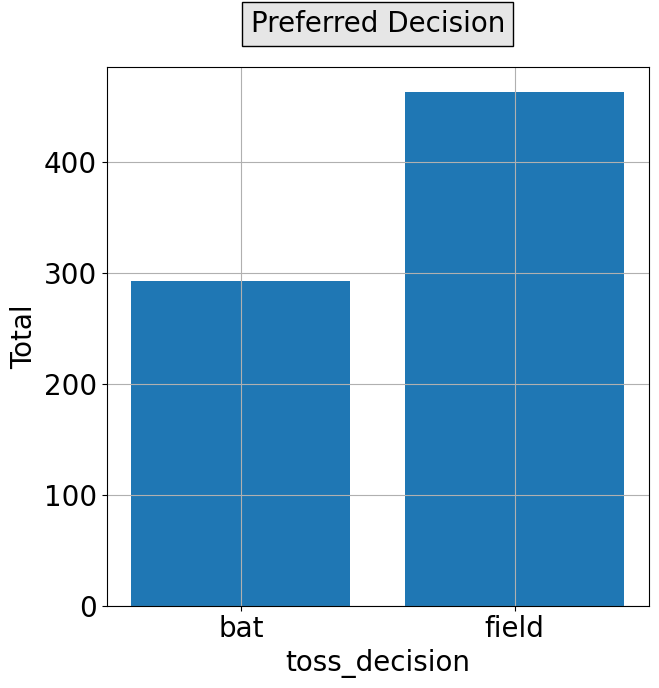

In [33]:
#plotting the data
plt.figure(figsize=(7,7))
plt.title("Preferred Decision",fontsize=20,bbox={'facecolor':'0.9','pad':6},pad=25)
plt.xlabel('toss_decision',fontsize=20)
plt.ylabel('Total',fontsize=20)
plt.grid()
plt.tick_params(labelsize=20)
plt.bar(decision_df.toss_decision, decision_df.Total)

**Which team won IPL Trophy most number of times**

First, we will have to extract the final matches from the data frame.

After this we can sort the matches season wise and then select the last match of the season.

In [34]:
final_df = ipl_df.groupby('season').tail(1).copy()
final_df = final_df.sort_values('season')
final_df = final_df.reset_index(drop=True)

def highlight_data(x):
  df=x.copy()
  df.loc[: , :]='background-color:white'
  df.winner = 'background-color:blue'
  return df
final_df.style.apply(highlight_data,axis=None)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,117,2008,Mumbai,2008-06-01,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,YK Pathan,Dr DY Patil Sports Academy
1,174,2009,Johannesburg,2009-05-24,Deccan Chargers,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Deccan Chargers,6,0,A Kumble,New Wanderers Stadium
2,234,2010,Mumbai,2010-04-25,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Chennai Super Kings,22,0,SK Raina,Dr DY Patil Sports Academy
3,307,2011,Chennai,2011-05-28,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,normal,0,Chennai Super Kings,58,0,M Vijay,"MA Chidambaram Stadium, Chepauk"
4,381,2012,Chennai,2012-05-27,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,bat,normal,0,Kolkata Knight Riders,0,5,MS Bisla,"MA Chidambaram Stadium, Chepauk"
5,457,2013,Kolkata,2013-05-26,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,23,0,KA Pollard,Eden Gardens
6,517,2014,Bengaluru,2014-06-01,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,3,MK Pandey,M Chinnaswamy Stadium
7,576,2015,Kolkata,2015-05-24,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Mumbai Indians,41,0,RG Sharma,Eden Gardens
8,636,2016,Bengaluru,2016-05-29,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium
9,59,2017,Hyderabad,2017-05-21,Mumbai Indians,Rising Pune Supergiant,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,KH Pandya,"Rajiv Gandhi International Stadium, Uppal"


In [35]:
final_count_df=final_df.groupby('winner')[['id']].count()
#change the name of colun id to no of times
final_count_df.rename(columns={'id':'no_of_times'},inplace=True)
final_count_df=final_count_df.reset_index()
final_count_df.style.hide_index().background_gradient()

<ipython-input-35-ecf9db72babe>:5: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  final_count_df.style.hide_index().background_gradient()


winner,no_of_times
Chennai Super Kings,3
Deccan Chargers,1
Kolkata Knight Riders,2
Mumbai Indians,4
Rajasthan Royals,1
Sunrisers Hyderabad,1


<BarContainer object of 6 artists>

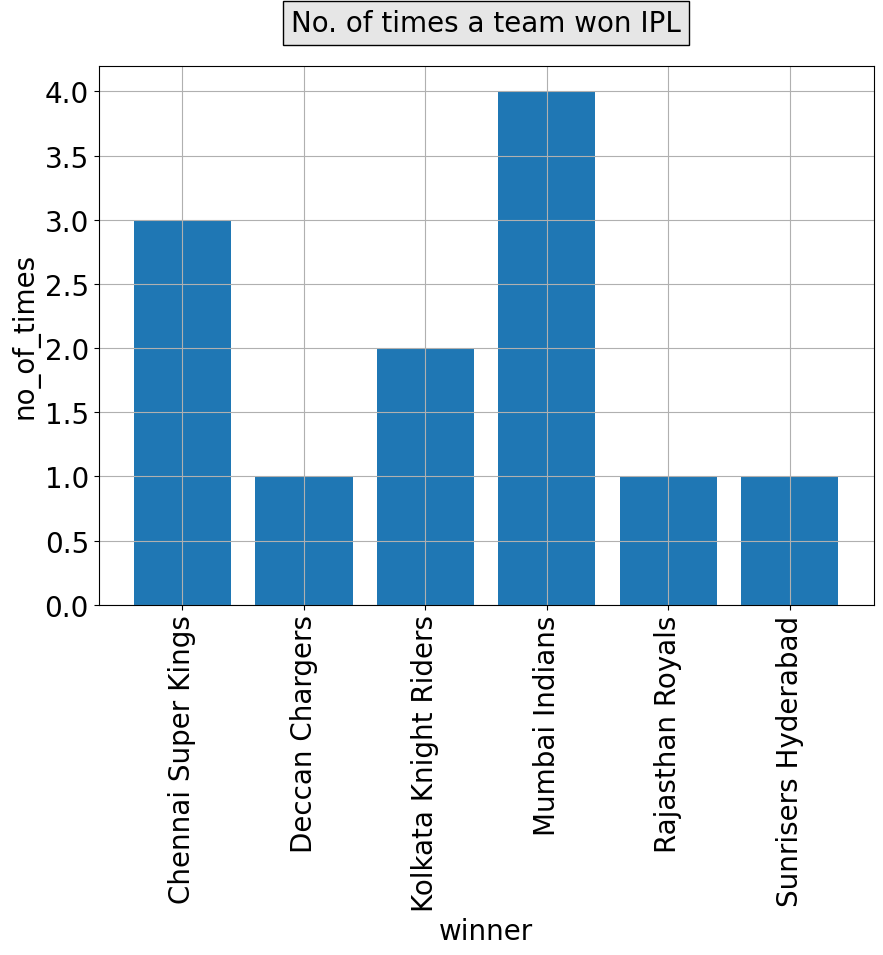

In [36]:
#plotting the data
plt.figure(figsize=(10,7))
plt.title("No. of times a team won IPL",fontsize=20,bbox={'facecolor':'0.9','pad':6},pad=25)
plt.xlabel('winner',fontsize=20)
plt.ylabel('no_of_times',fontsize=20)
plt.grid()
plt.tick_params(labelsize=20)
plt.xticks(rotation=90)
plt.bar(final_count_df.winner,final_count_df.no_of_times)

**Find most times awarded player of the match**

In [37]:
#Lets Check how many players have been awarded 
'Total players awarded are '+str(len(ipl_df.player_of_match.unique()))

'Total players awarded are 227'

In [38]:
# Extract the data
pom_df=ipl_df.groupby('player_of_match')[['id']].count()
pom_df = pom_df.sort_values('id',ascending=False).reset_index()
pom_df.rename(columns={'id':'No. of times'},inplace=True)

#Now from these players let extract top 10 players
pom_df = pom_df.head(10)
pom_df.index=np.arange(1,len(pom_df)+1)
pom_df.style.background_gradient()

,player_of_match,No. of times
1,CH Gayle,21
2,AB de Villiers,20
3,MS Dhoni,17
4,RG Sharma,17
5,DA Warner,17
6,YK Pathan,16
7,SR Watson,15
8,SK Raina,14
9,G Gambhir,13
10,AM Rahane,12


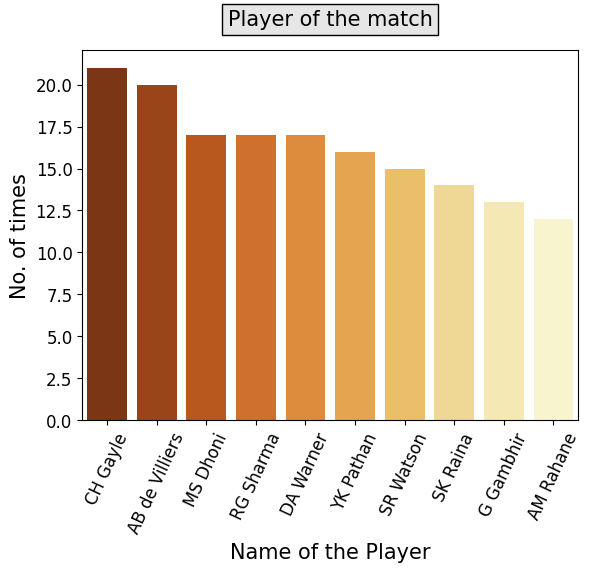

In [39]:
# Now visualise data using matlotlib and seaborn
sns.barplot(x='player_of_match',y='No. of times',data=pom_df,palette='YlOrBr_r');
# pad  is use to set padding and bbox is use to put the title in a box
plt.title('Player of the match',fontsize=15,bbox={'facecolor':'0.9','pad':4},pad=18)
# To set the size of ticks
plt.tick_params(labelsize=12)
# To set the degree of rotation on x-ticks
plt.xticks(rotation=65)
plt.xlabel("Name of the Player",size=15)
plt.ylabel("No. of times",size=15);

**Most number of finals played by team**

In [49]:
#preparing data frame 
df1 = pd.DataFrame({'team_name':final_df.team1,'id':final_df.id})
df2 = pd.DataFrame({'team_name':final_df.team2,'id':final_df.id})
#now concatenate
team_final=pd.concat([df1,df2],ignore_index=True)
#now arrange the data in organised manner
team_final=team_final.groupby('team_name')[['id']].count()
#now change the column name
team_final.rename(columns={'id':'no. of times'},inplace=True)
team_final=team_final.sort_values('no. of times',ascending=False).reset_index()
team_final.style.background_gradient()

,team_name,no. of times
0,Chennai Super Kings,8
1,Mumbai Indians,5
2,Royal Challengers Bangalore,3
3,Kolkata Knight Riders,2
4,Sunrisers Hyderabad,2
5,Deccan Chargers,1
6,Kings XI Punjab,1
7,Rajasthan Royals,1
8,Rising Pune Supergiant,1


**From the above observation the Chennai Super Kings played most number of finals**